## First Order Differential Equation

In [28]:
def forwardDifference(f, x, h):
    return (f(x+h) - f(x))/h

def backwardDifference(f, x, h):
    return (f(x) - f(x-h))/h

def centralDifference(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)

def myFunc(x):
    return 2*x**3 + 4*x**2 - 5*x

x = 1
h = 0.01

dydt_f = forwardDifference(myFunc, x, h)
dydt_b = backwardDifference(myFunc, x, h)
dydt_c = centralDifference(myFunc, x, h)

exact = 6*x**2 + 8*x - 5

print("Forward difference =", dydt_f)
print("Backward difference =", dydt_b)
print("Central difference =", dydt_c)
print("Exact value =", exact)

Forward difference = 9.100200000000047
Backward difference = 8.90019999999998
Central difference = 9.000200000000014
Exact value = 9


## Second Order Differential Equation 

In [29]:
def forwardDifference(f, x, h):
    return (f(x+h+h) - 2*f(x+h) + f(x))/h**2

def backwardDifference(f, x, h):
    return (f(x) - 2*f(x-h) + f(x-h-h))/h**2

def centralDifference(f, x, h):
    return (f(x+h) - 2*f(x) + f(x-h))/h**2

def myFunc(x):
    return 2*x**3 + 4*x**2 - 5*x

x = 1
h = 0.1

dydt_f = forwardDifference(myFunc, x, h)
dydt_b = backwardDifference(myFunc, x, h)
dydt_c = centralDifference(myFunc, x, h)
exact = 12*x + 8

print("Forward difference =", dydt_f)
print("Backward difference =", dydt_b)
print("Central difference =", dydt_c)
print("Exact value =", exact)


Forward difference = 21.199999999999882
Backward difference = 18.79999999999997
Central difference = 20.000000000000192
Exact value = 20


## Numerical Integration using Trapezoidal Rule

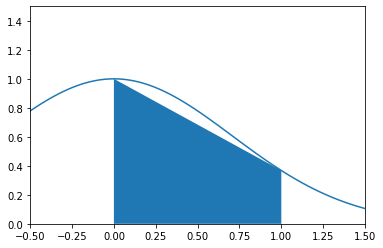

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(-0.5,1.5,100)
y = np.exp(-x**2)   # function
plt.plot(x,y)

x0 = 0; x1 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

In [32]:
A = 0.5*(y1 + y0)*(x1 - x0)
print("Trapezoid area:", A)

Trapezoid area: 0.6839397205857212


In [33]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

Let's test our function:

$$\int_0^{\pi/2} \sin x \ dx = 1$$

In [35]:
trapz(np.sin,0,np.pi/2,1000)

0.9999997943832332

Let's test our function again:

$$\int_0^1 3 x^2 \ dx = 1$$

In [36]:
trapz(lambda x : 3*x**2,0,1,1000)

1.0000005

For function:

$$\int_0^5 \frac{1}{1 + x^2} dx = \arctan(5)$$

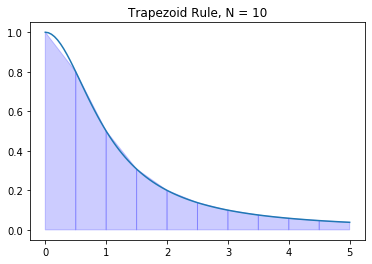

In [37]:
f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

In [41]:
## Trapezoidal Value
T = trapz(f,a,b,N=25)
print(T)

1.3733514712721437


In [42]:
## Actual Value
I = np.arctan(5)
print(I)

1.373400766945016


In [43]:
print("Trapezoid Rule Error:",np.abs(I - T))

Trapezoid Rule Error: 4.929567287215164e-05


## Definite Integration using scipy library

In [45]:
from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2


res, err = quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})".format(res, err))

The numerical result is 17.864264 (+-1.55117e-11)


In [53]:
from scipy.integrate import trapz

f = lambda x : -2 * x * pi 
x = np.linspace(-2,2,10)
y = f(x)
trapz(x,y)

1.7763568394002505e-15